In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 6s 0us/step


In [3]:
print(type([max(sequence) for sequence in train_data]))

# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [4]:
word_index = imdb.get_word_index()

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
#
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_review

1641221/1641221 [==============================] - 3s 2us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [6]:

X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:

X_train.shape

(25000, 10000)

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:

from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

C:\Users\yash\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:

history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 10s 269ms/step - loss: 0.5371 - binary_accuracy: 0.7718 - val_loss: 0.4036 - val_binary_accuracy: 0.8705
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3233 - binary_accuracy: 0.9000 - val_loss: 0.3191 - val_binary_accuracy: 0.8812
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2338 - binary_accuracy: 0.9262 - val_loss: 0.2802 - val_binary_accuracy: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1793 - binary_accuracy: 0.9425 - val_loss: 0.2744 - val_binary_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1439 - binary_accuracy: 0.9551 - val_loss: 0.2839 - val_binary_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1199 - binary_accuracy: 0.9631 - val_loss: 0.2951 - val_binary_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - l

In [13]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [14]:

import matplotlib.pyplot as plt
%matplotlib inline

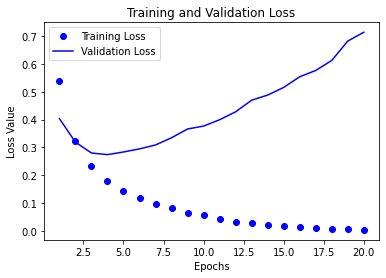

In [15]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

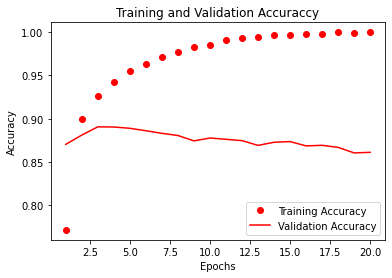

In [16]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
     

In [17]:
model.fit(partial_X_train,
                   partial_y_train,
                   epochs=3,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/3
30/30 [==============================] - 2s 63ms/step - loss: 0.0065 - binary_accuracy: 0.9985 - val_loss: 0.7184 - val_binary_accuracy: 0.8666
Epoch 2/3
30/30 [==============================] - 1s 26ms/step - loss: 0.0021 - binary_accuracy: 0.9999 - val_loss: 0.7560 - val_binary_accuracy: 0.8652
Epoch 3/3
30/30 [==============================] - 1s 22ms/step - loss: 0.0047 - binary_accuracy: 0.9989 - val_loss: 0.7828 - val_binary_accuracy: 0.8644


In [18]:
np.set_printoptions(suppress=True)
result = model.predict(X_test)


782/782 [==============================] - 2s 2ms/step


In [19]:

result

array([[0.00166972],
       [0.9999998 ],
       [0.9716856 ],
       ...,
       [0.00072944],
       [0.00881395],
       [0.8261115 ]], dtype=float32)

In [20]:

y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0

In [21]:

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)

In [22]:

# Error
mae

0.1494